In [1]:
import math
import csv
import random
from string import punctuation, digits
import numpy as np
import pandas as pd
import project1 as p1
import utils

# 1. Introduction

This project is an assignment in the course - Machine Learning with Python-From Linear Models to Deep Learning by MITx. This course is part of the MITx MicroMasters Program in Statistics and Data Science.
For further details, please visit (https://www.edx.org/course/machine-learning-with-python-from-linear-models-to).


The goal of this project is to design a classifier to use for sentiment analysis of product reviews. The training set consists of reviews written by Amazon customers for various food products. The reviews have been adjusted to a +1 or -1 scale, representing a positive or negative review respectively.

Below are two example entries from the dataset. Each entry consists of the review and its label. The two reviews were written by different customers describing their experience with a sugar-free candy.

#### Positive Review (1):

*YUMMY! You would never guess that they're sugar-free and it's so great that you can eat them pretty much guilt free! i was so impressed that i've ordered some for myself (w dark chocolate) to take to the office. These are just EXCELLENT!*


#### Negative Review (-1):
*Nasty No flavor. The candy is just red, No flavor. Just plan and chewy. I would never buy them again*

In order to automatically analyze reviews, we will be achieving below:

1. Implement and compare three types of linear classifiers: the perceptron algorithm, the average perceptron algorithm, and the Pegasos algorithm.


2. Use the classifiers on the food review dataset, using some simple text features.


3. Experiment with additional features and explore their impact on classifier performance.


For setup details, please visit readme.

# 2. Hinge Loss

We will be implementing linear classifiers beginning with the Perceptron algorithm. Let's begin by writing the loss function, a hinge-loss function. Given the parameters of the model $\theta$ and $\theta_{0}$, with a feature matrix in which the rows are feature vectors and the columns are individual features, and a vector of labels representing the actual sentiment of the corresponding feature vector.

### Hinge Loss on One Data Sample:

- Implement the basic hinge loss calculation on a single data-point.
- Given one row, representing the feature vector of a single data sample, and its label of +1 or -1 representing the ground truth sentiment of the data sample.

In [8]:
def hinge_loss_single(feature_vector, label, theta, theta_0):
    """
    Finds the hinge loss on a single data point given specific classification
    parameters.

    Args:
        feature_vector - A numpy array describing the given data point.
        label - A real valued number, the correct classification of the data
            point.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given data point and parameters.
    """  
    loss = np.dot(label, (np.dot (feature_vector, theta) + theta_0) )
    
    if loss >= 1:
        return 0    
    else:
        return 1-loss

Alternative way:

In [6]:
def hinge_loss_single(feature_vector, label, theta, theta_0):

    sample = np.dot(theta, feature_vector) + theta_0
    loss = max(0, 1 - sample * label)
    
    return loss

In [7]:
# Testing
fv = np.array([-0.97723243,-0.6187903,-0.19905415,-0.4841157,-0.87421225,-0.96968994,-0.92037499,-0.0183755,-0.78134602,-0.84497447])
lb = np.array([1])
thet = np.array([0.59250839,0.45874469,0.67623951,0.03248779,0.50331937,0.06379465,0.71430772,0.71453848,0.27368386,0.14996318])
t0 = np.array([0.9571994315730257])

In [9]:
hinge_loss_single(fv,lb,thet,t0)

2.5690086816148563

### The Complete Hinge Loss:

- Implement the complete hinge loss for a full set of data. 
- The input will be a full feature matrix with a vector of corresponding labels. 
- The $𝑘^{𝑡ℎ}$ row of the feature matrix corresponds to the $𝑘^{𝑡ℎ}$ element of the labels vector.
- This function should return the appropriate loss of the classifier on the given dataset.

In [10]:
def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    """
    Finds the total hinge loss on a set of data given specific classification
    parameters.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given dataset and parameters. This number should be the average hinge
    loss across all of the points in the feature matrix.
    """
    samples = np.dot(feature_matrix, theta) + theta_0
    loss = np.maximum(0,1 - samples * labels)
    
    return np.mean(loss)

In [11]:
# Testing
label=np.array([[1,-1]])
feature_vector=np.array([[1,1],[-1,-2]])
theta=np.array([2,-1])
theta_0=np.array([-0.09])

In [12]:
hinge_loss_full(feature_vector,label,theta,theta_0)

0.5

## 3. Perceptron Algorithm

### Perceptron Single Step Update

- Implement the single step update for the perceptron algorithm (implemented with  0−1  loss). 
- Given the feature vector as an array of numbers, the current  $\theta$  and  $\theta_{0}$  parameters, and the correct label of the feature vector.
- The function should return a tuple in which the first element is the correctly updated value of  𝜃  and the second element is the correctly updated value of $\theta_{0}$.
- Because of numerical instabilities, it is preferable to identify  0  with a small range  $[−𝜀,𝜀]$ . That is, when 𝑥  is a float, “$𝑥=0$" should be checked with  $|𝑥|<𝜀$ .

In [13]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    if np.dot(label, np.dot(feature_vector, current_theta) + current_theta_0) <= 0:
        current_theta += label*feature_vector
        current_theta_0 += label
    
    return (current_theta, current_theta_0)

In [14]:
# Testing
label=np.array([1])
feature_vector=np.array([-0.30098865,-0.22338063,-0.14351074,-0.39295249,0.28328912,0.1623816,-0.18250323,-0.44837184,-0.23313966,0.41826949])
theta=np.array([0.21483225,0.09022448,-0.49163011,0.45982066,-0.37025282,-0.06574579,0.13334412,-0.41311716,-0.30654646,0.32481016])
theta_0=np.array([-0.3118844835679302])

In [15]:
perceptron_single_step_update(feature_vector,label,theta,theta_0)

(array([-0.0861564 , -0.13315615, -0.63514085,  0.06686817, -0.0869637 ,
         0.09663581, -0.04915911, -0.861489  , -0.53968612,  0.74307965]),
 array([0.68811552]))

### Full Perceptron Algorithm

- Implement the full perceptron algorithm. 
- Given the same feature matrix and labels array.
- Given  𝑇, the maximum number of times iterated through the feature matrix before terminating the algorithm.
- Initialize $\theta$ and $\theta_{0}$ to zero. This function should return a tuple in which the first element is the final value of  𝜃  and the second element is the value of $\theta_{0}$.

In [16]:
def get_order(n_samples):
    
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
        
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

In [17]:
def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    theta = np.zeros(feature_matrix.shape[1])
    theta_0 = np.zeros(1)
    
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i], labels[i], theta, theta_0)            
    return (theta, theta_0)

In [18]:
# Testing
feature_matrix = np.array([[-0.241485,-0.00438665,0.42761743,-0.1754104,-0.37755185,-0.15326276,0.49056648,-0.41864207,-0.26456507,0.08551939],
                         [0.15765203,0.25720482,-0.41080919,-0.47600271,0.12117096,-0.13991396,0.01799826,-0.49558969,-0.45196089,-0.06542692],
                         [0.34983416,0.15117678,0.4577807,-0.09482514,-0.15513337,-0.15029327,0.0459572,-0.42345903,0.13167843,-0.29939736],
                         [-0.36550193,-0.25271942,0.15570239,-0.22399107,-0.08598592,-0.0436965,0.30516745,-0.49457825,0.18292549,-0.04594556],
                         [0.46499563,0.01201684,0.10538977,0.13823639,0.28707952,0.15294429,0.42232569,0.02961384,0.05027655,0.46183701]])
labels = np.array([-1,1,1,1,1])
theta = np.zeros(feature_matrix.shape[1])
theta_0 = np.zeros(1)

In [19]:
perceptron(feature_matrix,labels,5)

(array([ 1.21627342,  0.31999891, -0.62239769, -0.36341286,  0.85757385,
        -0.02440872, -1.05661933, -0.58115979,  0.78801667, -0.96672537]),
 array([1.]))

### Average Perceptron Algorithm

- The average perceptron will add a modification to the original perceptron algorithm.
- Since the basic algorithm continues updating as the algorithm runs, nudging parameters in possibly conflicting directions, it is better to take an average of those parameters as the final answer. Every update of the algorithm is the same as before. 
- The returned parameters $\theta$, however, are an average of the $\theta$s across the 𝑛𝑇 steps:

    $\theta_{𝑓𝑖𝑛𝑎𝑙}=\frac{1}{𝑛𝑇}(\theta(1)+\theta(2)+...+\theta(𝑛𝑇)$
- Implement the average perceptron algorithm. This function should be constructed similarly to the Full Perceptron Algorithm above, except that it should return the average values of $\theta$ and $\theta_{0}$

In [20]:
def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])


    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    the average theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the average theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.

    Hint: It is difficult to keep a running average; however, it is simple to
    find a sum and divide.
    """
    ndim, nfeat = feature_matrix.shape
    theta = np.zeros(nfeat)
    theta_0 = np.zeros(1)
    
    theta_sum = np.zeros(nfeat)
    theta_0_sum = np.zeros(1)
    
    for t in range(T):
        for i in get_order(ndim):
            theta, theta_0 = perceptron_single_step_update(feature_matrix[i], labels[i], theta, theta_0)        
            theta_sum += theta
            theta_0_sum += theta_0
            
    theta_avg = theta_sum / (T*ndim)
    theta_0_avg = theta_0_sum / (T*ndim)
    
    return (theta_avg, theta_0_avg)

In [21]:
# Testing
feature_matrix = np.array([[-0.29410607,0.10255774,0.45550074,0.21006861,0.45019765,-0.19505721,0.30638958,0.11893576,0.37384992,-0.43397371],
                           [-0.26963692,-0.12986604,-0.38062796,-0.25333051,-0.36969097,0.38783857,-0.34229984,0.1841726,-0.08486814,-0.09106342],
                           [-0.00430717,0.00318392,-0.00968131,0.0277202,0.08648137,-0.30382983,0.49527442,0.48602142,0.37490388,0.30562731],
                           [-0.45624443,0.09665835,-0.08817391,-0.03120877,-0.4136364,0.47740267,0.30084486,-0.023368,0.40833924,0.03270122],
                           [0.33211803,-0.16934064,-0.31306794,0.00620187,-0.45922554,0.15611071,0.3900817,0.45766431,0.36165809,0.0519212,]])
labels = np.array([-1,1,1,1,-1])
theta = np.zeros(feature_matrix.shape[1])
theta_0 = np.zeros(1)

In [22]:
average_perceptron(feature_matrix,labels,5)

(array([-1.0793858 ,  0.24283345, -0.19809494, -0.48434983,  0.24840979,
        -0.22260192, -0.38217643,  0.02437905, -0.33719525,  1.02188412]),
 array([0.28]))

# 4. Pegasos Algorithm

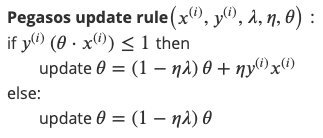

### Pegasos Single Step Update

- Implement the single step update for the Pegasos algorithm. 
- This function is very similar to the function that implemented in Perceptron Single Step Update, except that it should utilize the Pegasos parameter update rules instead of those for perceptron.
- The function will also be passed a $\lambda$ and  $\eta$ value to use for updates.

In [28]:
def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the Pegasos algorithm

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        L - The lamba value being used to update the parameters.
        eta - Learning rate to update parameters.
        current_theta - The current theta being used by the Pegasos
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the
            Pegasos algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    loss = np.dot(label, (np.dot (feature_vector, current_theta) + current_theta_0) )
    eL = 1 - (eta * L)
    
    if loss <= 1:
        current_theta = (eL * current_theta) + (eta * label * feature_vector)   
        current_theta_0 += eta * label
    else:
        current_theta = eL * current_theta
    
    return (current_theta, current_theta_0)

In [30]:
# Testing
feature_vector = np.array([-0.01281239,0.30684919,-0.33899287,-0.11746904,0.05425242,-0.43342372,-0.14234217,-0.01157844,0.39042238,0.29075639])
label = np.array([1])
L = 0.05213570238314713
eta = 0.34706662732903304
theta = np.array([-0.3757919,0.44849175,-0.40585257,-0.31316715,0.2926439,-0.49193557,0.30385662,0.15166802,-0.05761131,0.30850935])
theta_0 = 1.3310948344917235

In [31]:
pegasos_single_step_update(feature_vector,label,L,eta,theta,theta_0)

(array([-0.36899211,  0.44037649, -0.39850885, -0.30750053,  0.28734864,
        -0.48303421,  0.29835847,  0.14892365, -0.05656886,  0.30292701]),
 1.3310948344917235)

### Full Pegasos Algorithm

- Implement the full Pegasos algorithm
- Given the same feature matrix and labels array as given in Full Perceptron Algorithm
- Given 𝑇, the maximum number of times that the function iterates through the feature matrix before terminating the algorithm. 
- Initialize $\theta$ and  $\theta_{0}$  to zero. 
- For each update, set  $\eta$ = $\frac{1}{\sqrt(t)}$ where $t$ is a counter for the number of updates performed so far (between  1  and  𝑛𝑇  inclusive). 
- This function should return a tuple in which the first element is the final value of $\theta$ and the second element is the value of $\theta_{0}$.

In [34]:
def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    For each update, set learning rate = 1/sqrt(t),
    where t is a counter for the number of updates performed so far (between 1
    and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        L - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns: A tuple where the first element is a numpy array with the value of
    the theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.
    """
    ndim, nfeat = feature_matrix.shape
    theta = np.zeros(nfeat)
    theta_0 = np.zeros(1)
    count = 0
    
    for t in range(T):
        for i in get_order(ndim):
            count += 1
            eta = 1 / np.sqrt(count)
            theta, theta_0 = pegasos_single_step_update(feature_matrix[i], labels[i], L, eta, theta, theta_0)
            
    return (theta, theta_0)   

In [35]:
# Testing
feature_matrix = np.array([[0.1837462,0.29989789,-0.35889786,-0.30780561,-0.44230703,-0.03043835,0.21370063,0.33344998,-0.40850817,-0.13105809],
 [0.08254096,0.06012654,0.19821234,0.40958367,0.07155838,-0.49830717,0.09098162,0.19062183,-0.27312663,0.39060785],
 [-0.20112519,-0.00593087,0.05738862,0.16811148,-0.10466314,-0.21348009,0.45806193,-0.27659307,0.2901038,-0.29736505],
 [-0.14703536,-0.45573697,-0.47563745,-0.08546162,-0.08562345,0.07636098,-0.42087389,-0.16322197,-0.02759763,0.0297091],
 [-0.18082261,0.28644149,-0.47549449,-0.3049562,0.13967768,0.34904474,0.20627692,0.28407868,0.21849356,-0.01642202]])
labels = np.array([-1,-1,-1,1,-1])
T = 10
L = 0.1456692551041303

In [36]:
pegasos(feature_matrix,labels,T,L)

(array([-0.0788906 , -0.75570849, -0.31067529, -0.05412326, -0.13880071,
         0.09435494, -0.74886923, -0.41457537, -0.07151218, -0.02349776]),
 array([-0.760748]))

# 5. Algorithm Discussion

Qualitatively verify the implementations with a 2D dataset from toy_data.txt.

- Trains the models using  𝑇 = 10, $\lambda$ = 0.2.
- main.py will compute $\theta$ and $\theta_{0}$ for each of the learning algorithms that written. 
- Then, it will call plot_toy_data to plot the resulting model and boundary.

In [37]:
def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.
    """
    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] = 1
    return feature_matrix

In [57]:
def extract_words(input_string):
    """
    Helper function for bag_of_words()
    Inputs a text string
    Returns a list of lowercase words in the string.
    Punctuation and digits are separated out into their own words.
    """
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    return input_string.lower().split()

def bag_of_words(texts):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input

    Feel free to change this code as guided by Problem 9
    """
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in dictionary:
                dictionary[word] = len(dictionary)
    return dictionary

In [58]:
train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

theta for Perceptron is 3.9173999999999918, 4.164000000000001
theta_0 for Perceptron is [-8.]


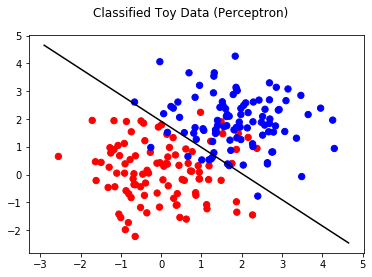

theta for Average Perceptron is 3.47826049999999, 3.611060999999974
theta_0 for Average Perceptron is [-6.373]


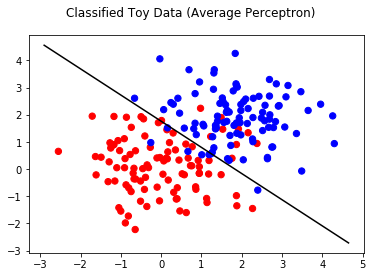

theta for Pegasos is 0.7346463119064065, 0.6300224592973831
theta_0 for Pegasos is [-1.21950718]


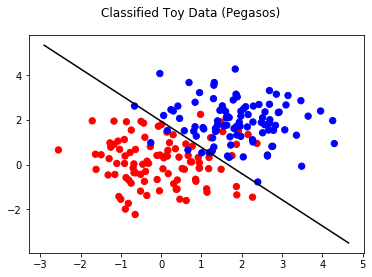

In [59]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 10
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

theta for Perceptron is 3.9264999999998995, 3.520599999999991
theta_0 for Perceptron is [-7.]


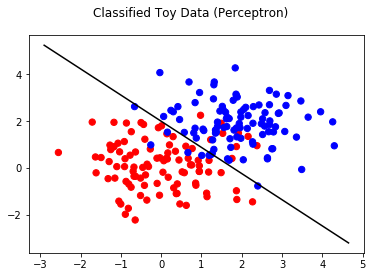

theta for Average Perceptron is 3.8735113949998436, 3.8802419599999936
theta_0 for Average Perceptron is [-7.01295]


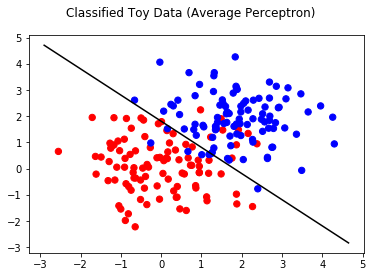

theta for Pegasos is 0.6895719966639845, 0.5714970011329141
theta_0 for Pegasos is [-1.24261414]


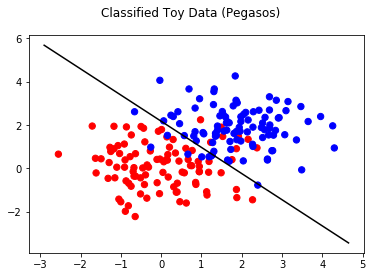

In [60]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 100 # More iterations
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

theta for Perceptron is 3.31889999999955, 5.5647999999999795
theta_0 for Perceptron is [-8.]


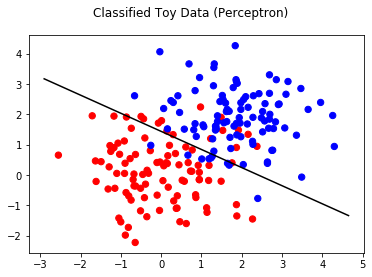

theta for Average Perceptron is 3.8687850989995813, 3.8903095659998432
theta_0 for Average Perceptron is [-7.05808]


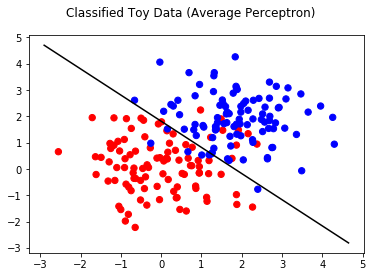

theta for Pegasos is 0.6708387963810953, 0.5849882176940737
theta_0 for Pegasos is [-1.23086574]


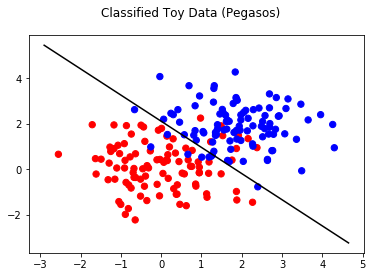

In [61]:
toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 500 # And more iterations
L = 0.2

thetas_perceptron = perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

Running with a larger number of iterations 𝑇, it is interesting to find that Average Perceptron algorithm and Pegasos Algorithm will eventually converge (the parameters will converge to particular values and no longer change) on this dataset.

# 6. Automative review analyzer

- Having verified the correctness of the implementations, let's tackle the main task of this project:
    - building a classifier that labels reviews as positive or negative using text-based features;
    - and the linear classifiers that implemented in the previous section

### The Data

The data consists of several reviews, each of which has been labeled with  −1  or  +1 , corresponding to a negative or positive review, respectively. The original data has been split into four files:
- reviews_train.tsv (4000 examples)
- reviews_validation.tsv (500 examples)
- reviews_test.tsv (500 examples)

### Translating reviews to feature vectors

1. Convert review texts into feature vectors using a bag of words approach.

    - Compile all the words that appear in a training set of reviews into a dictionary.
    - Produce a list of 𝑑 unique words.



2. Transform each of the reviews into a feature vector of length 𝑑 by setting the $𝑖^{th}$ coordinate of the feature vector to 1 if the $𝑖^{th}$ word in the dictionary appears in the review, or 0 otherwise.

    - For instance, consider two simple documents “Mary loves apples" and “Red apples". In this case, the dictionary is the set {Mary;loves;apples;red}, and the documents are represented as (1;1;1;0) and (0;0;1;1) .



3. A bag of words model can be easily expanded to include phrases of length 𝑚. 

    - A unigram model is the case for which  𝑚 = 1 . In the example, the unigram dictionary would be  (Mary;loves;apples;red) . 
    - In the bigram case,  𝑚 = 2 , the dictionary is  (Mary loves;loves apples;Red apples), and representations for each sample are (1;1;0),(0;0;1) . 
    - In this section, only use the unigram word features. These functions are already implemented in the bag of words function.



4. Supplied function in utils.py.

    - The load data function is given, which can be used to read the .tsv files and returns the labels and texts. 
    - The bag_of_words function is also supplied in project1.py, which takes the raw data and returns dictionary of unigram words. 
    - The resulting dictionary is an input to extract_bow_feature_vectors which computes a feature matrix of ones and zeros that can be used as the input for the classification algorithms.
    - Using the feature matrix and the implementation of learning algorithms from before, $\theta$ and $\theta_{0}$ can be calculated.

# 7. Classification and Accuracy

Now we need a way to actually use the model to classify the data points. In this section, we will implement a way to classify the data points using the model parameters, and then measure the accuracy of the model.

### Classification
- Implement a classification function that uses $\theta$ and $\theta_{0}$ to classify a set of data points.
- Given the feature matrix, $\theta$, and $\theta_{0}$ as defined in previous sections.
- This function should return a numpy array of -1s and 1s.
- If a prediction is greater than zero, it should be considered a positive classification.

In [62]:
def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses theta and theta_0 to classify a set of
    data points.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
                theta - A numpy array describing the linear classifier.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    Returns: A numpy array of 1s and -1s where the kth element of the array is
    the predicted classification of the kth row of the feature matrix using the
    given theta and theta_0. If a prediction is GREATER THAN zero, it should
    be considered a positive classification.
    """
    ndim, nfeat = feature_matrix.shape
    prediction = np.zeros(ndim)

    for i in range(ndim):
        if np.dot(feature_matrix[i], theta) + theta_0 > 0:
            prediction[i] = 1
        else:
            prediction[i] = -1
            
    return prediction

In [63]:
# Testing
feature_matrix = np.random.rand(5,9)
theta = np.random.rand(feature_matrix.shape[1])
theta_0 = np.random.rand(1)

In [64]:
classify(feature_matrix,theta,theta_0)

array([1., 1., 1., 1., 1.])

### Accuracy

- The accuracy function takes a numpy array of predicted labels and a numpy array of actual labels and returns the prediction accuracy.
- Use this function along with the functions that have been implemented thus far in order to implement classifier_accuracy.

In [65]:
def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()

The classifier_accuracy function should take 6 arguments:

- a classifier function that, itself, takes arguments (feature_matrix, labels, **kwargs)

- the training feature matrix

- the validation feature matrix

- the training labels

- the valiation labels

- a **kwargs argument to be passed to the classifier function

This function should train the given classifier using the training data and then compute compute the classification accuracy on both the train and validation data.
The return values should be a tuple where the first value is the training accuracy and the second value is the validation accuracy.

In [66]:
def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.

    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    # training classifier
    theta, theta_0 = classifier(train_feature_matrix, train_labels, **kwargs)
    
    # predict training set labels and evaluate classifier's accuracy
    train_pred = classify(train_feature_matrix, theta, theta_0)
    train_accuracy = accuracy(train_pred, train_labels)
    
    # predict validation set labels and evaluate classifier'saccuracy
    val_pred = classify(val_feature_matrix, theta, theta_0)
    val_accuracy = accuracy(val_pred, val_labels)
    
    return (train_accuracy, val_accuracy)

### Baseline Accuracy

- Report the training and validation accuracies of each algorithm with T = 10 and  𝜆  = 0.01 (the  𝜆  value only applies to Pegasos).

In [67]:
T = 10
L = 0.01

pct_train_accuracy, pct_val_accuracy = \
   classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

avg_pct_train_accuracy, avg_pct_val_accuracy = \
   classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

avg_peg_train_accuracy, avg_peg_val_accuracy = \
   classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for perceptron:   0.8157
Validation accuracy for perceptron: 0.7160
Training accuracy for average perceptron:   0.9728
Validation accuracy for average perceptron: 0.7980
Training accuracy for Pegasos:                     0.9143
Validation accuracy for Pegasos:                   0.7900


# 8. Parameter Tuning

The algorithms are finally up and running, with a way to measure performance! 
But, it's still unclear what values the hyperparameters like 𝑇 and $\lambda$ should have. In this section, we will tune these hyperparameters to maximize the performance of each model.

- One way to tune the hyperparameters for any given Machine Learning algorithm is to perform a grid search over all the possible combinations of values. If the hyperparameters can be any real number, we will need to limit the search to some finite set of possible values for each hyperparameter. 


- For efficiency reasons, often we might want to tune one individual parameter, keeping all others constant, and then move onto the next one.
    - Compared to a full grid search there are many fewer possible combinations to check, and this is what the followings are about.


- In main.py uncomment Problem 8 to run the staff-provided tuning algorithm from utils.py. 
    - For the purposes of this project, we will try with the following values for  𝑇 : [1, 5, 10, 15, 25, 50]. 
    - The following values for $\lambda$ [0.001, 0.01, 0.1, 1, 10]. 
    - For pegasos algorithm, first fix  $\lambda$ = 0.01 to tune 𝑇, and then use the best 𝑇 to tune $\lambda$.

In [68]:
def tune(train_fn, param_vals, train_feats, train_labels, val_feats, val_labels):
    train_accs = np.ndarray(len(param_vals))
    val_accs = np.ndarray(len(param_vals))

    for i, val in enumerate(param_vals):
        theta, theta_0 = train_fn(train_feats, train_labels, val)

        train_preds = classify(train_feats, theta, theta_0)
        train_accs[i] = accuracy(train_preds, train_labels)

        val_preds = classify(val_feats, theta, theta_0)
        val_accs[i] = accuracy(val_preds, val_labels)

    return train_accs, val_accs

def tune_perceptron(*args):
    return tune(perceptron, *args)

def tune_avg_perceptron(*args):
    return tune(average_perceptron, *args)

def tune_pegasos_T(best_L, *args):
    def train_fn(features, labels, T):
        return pegasos(features, labels, T, best_L)
    return tune(train_fn, *args)

def tune_pegasos_L(best_T, *args):
    def train_fn(features, labels, L):
        return pegasos(features, labels, best_T, L)
    return tune(train_fn, *args)

### Performance After Tuning
*Note that for the result for Pegasos algorithm does not reflect the best combination of 𝑇 and $\lambda$.

perceptron valid: [(1, 0.758), (5, 0.72), (10, 0.716), (15, 0.778), (25, 0.794), (50, 0.79)]
best = 0.7940, T=25.0000
avg perceptron valid: [(1, 0.794), (5, 0.792), (10, 0.798), (15, 0.798), (25, 0.8), (50, 0.796)]
best = 0.8000, T=25.0000
Pegasos valid: tune T [(1, 0.786), (5, 0.78), (10, 0.79), (15, 0.802), (25, 0.806), (50, 0.8)]
best = 0.8060, T=25.0000
Pegasos valid: tune L [(0.001, 0.786), (0.01, 0.806), (0.1, 0.762), (1, 0.568), (10, 0.518)]
best = 0.8060, L=0.0100


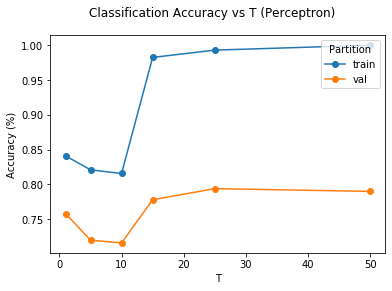

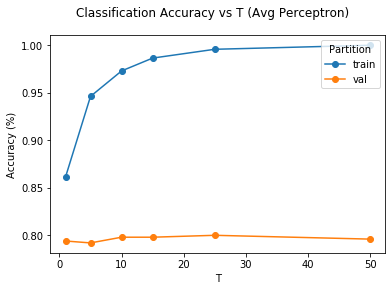

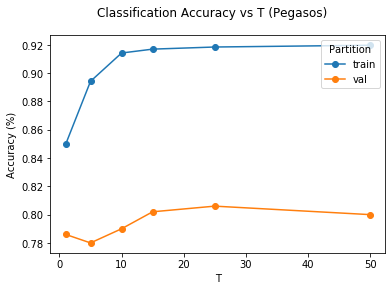

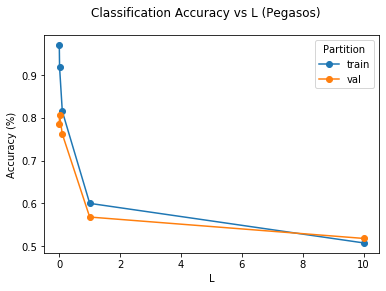

In [69]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)

# values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

pct_tune_results = tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

avg_pct_tune_results = tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

### Accuracy on the test set

- After chosen the best method (perceptron, average perceptron or Pegasos) and parameters, use this classifier to compute testing accuracy on the test set.

- Given the feature matrix and labels in main.py as test_bow_features and test_labels.

**Note**: In practice the validation set is used for tuning hyperparameters while a heldout test set is the final benchmark used to compare disparate models that have already been tuned. Noticed that the results using a validation set don't always align with those of the test set, and this is to be expected.

In [70]:
# Use the best method (perceptron, average perceptron or Pegasos) along with
# the optimal hyperparameters according to validation accuracies to test
# against the test dataset. The test data has been provided as
# test_bow_features and test_labels.

T = 25 # Best T from above tuning
L = 0.01 # Best Lambda from above tuning

peg_train_accuracy, peg_test_accuracy = \
        classifier_accuracy(pegasos, train_bow_features,test_bow_features,train_labels,test_labels,T=T,L=L)

print("{:50} {:.4f}".format("Pegasos - Training Accuracy:", peg_train_accuracy))
print("{:50} {:.4f}".format('Pegasos - Testing Accuracy:', peg_test_accuracy))

Pegasos - Training Accuracy:                       0.9185
Pegasos - Testing Accuracy:                        0.8020


### The most explanatory unigrams

- According to the largest weights (i.e. individual  𝑖  values in your vector), find out which unigrams were the most impactful ones in predicting positive labels. 
- Uncomment the relevant part in main.py to call utils.most_explanatory_word.

In [71]:
def most_explanatory_word(theta, wordlist):
    """Returns the word associated with the bag-of-words feature having largest weight."""
    return [word for (theta_i, word) in sorted(zip(theta, wordlist))[::-1]]

In [72]:
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.

best_theta = pegasos(train_bow_features, train_labels, T, L)[0]
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)

print("Most Explanatory Word Features:")
print(sorted_word_features[:10])

Most Explanatory Word Features:
['delicious', 'great', '!', 'best', 'perfect', 'loves', 'wonderful', 'glad', 'love', 'quickly']


# 9. Feature Engineering

- Frequently, the way the data is represented can have a significant impact on the performance of a machine learning method. 
- Try to improve the performance of the best classifier by using different features. 
- In the following, we will practice two simple variants of the bag of words (BoW) representation.

### Remove Stop Words

- Try to implement stop words removal in the feature engineering code. 
    - Specifically, load the file stopwords.txt, remove the words in the file from the dictionary, and use features constructed from the new dictionary to train the model and make predictions.

- Compare the result in the testing data on Pegasos algorithm using  𝑇 = 25  and  𝐿 = 0.01  when removing the words in stopwords.txt from the dictionary.

In [103]:
stopwords = []
with open('stopwords.txt','r') as f:
    reader = f.read().splitlines()
    
for word in reader:
    stopwords.append(word)
    
print(stopwords[:10],'\n',len(stopwords))

['si', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your'] 
 127


In [104]:
def extract_words(input_string):
    """
    Helper function for bag_of_words()
    Inputs a text string
    Returns a list of lowercase words in the string.
    Punctuation and digits are separated out into their own words.
    """
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    return input_string.lower().split()

# Modify as a exclude stop words version
def bag_of_words(texts,exclude):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input
    """
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text.lower())
        for word in word_list:
            if word not in dictionary and word not in exclude:
                    dictionary[word] = len(dictionary)
    return dictionary

In [106]:
def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.
    """
    num_reviews = len(reviews) # 4000
    feature_matrix = np.zeros([num_reviews, len(dictionary)]) # 4000 * 13108

    for i, text in enumerate(reviews): # 0 to 3999, 4000 sentences
        word_list = extract_words(text) # breakdown 4000 sentences to words
        for word in word_list:
            if word in dictionary: # matching words with dictionary
                feature_matrix[i,dictionary[word]] = 1 # feature matrix can be adjusted to [+1 for matched words]
    return feature_matrix

In [107]:
dictionary = bag_of_words(train_texts,stopwords)
train_bow_features = extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = extract_bow_feature_vectors(test_texts, dictionary)

print (len(dictionary))
print (train_bow_features.shape)
print (test_bow_features.shape)

13108
(4000, 13108)
(500, 13108)


In [108]:
T = 25
L = 0.01

peg_train_accuracy, peg_test_accuracy = \
        classifier_accuracy(pegasos,train_bow_features,test_bow_features,train_labels,test_labels,T=T,L=L)

print("{:50} {:.4f}".format("Pegasos - Training Accuracy:", peg_train_accuracy))
print("{:50} {:.4f}".format('Pegasos - Testing Accuracy:', peg_test_accuracy))

Pegasos - Training Accuracy:                       0.9135
Pegasos - Testing Accuracy:                        0.8120


In [109]:
best_theta = pegasos(train_bow_features, train_labels, T, L)[0]
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)

print("Most Explanatory Word Features:")
print(sorted_word_features[:10])

Most Explanatory Word Features:
['delicious', 'great', 'loves', '!', 'best', 'perfect', 'excellent', 'wonderful', 'favorite', 'love']


The Testing Accuracy is improved by 0.01 by removing the stop words!

## Thank you!